<h1> This is a statistical tool to analyze the "scaling property" in Chinese courpus </h1><p>
You can read details in count_allo.py <p>

<font color='red' size='4'> funtionalities: </font>(not listed in order)<p>
<font color='blue' size='4'>1. <b>info(filename, encode) </b><br></font>
the core function that give you statistical data, include <br>

a dataframe contain words and their all compositions (big), the frequency information of syllagrams (syl) and words (word), and the longest length of single word (longest)<br>

example: <br>
big, syl, word, longest = info('forg.txt', encode) <p>

<font color='blue' size='4'>2. <b>count_allo(word, syl) </b><br></font>
Using count_allo function to count allocations and chains of syllagrams and words <br>



<font color='blue' size='4'>3. <b>check ratio of geometric sequence {$H_{\ell}$} and {$V_m$} </b><br></font>
<font color='blue' size='4'>4. <b>draw RRD plot </b><br></font>
<font color='blue' size='4'>5. <b>draw FRD plot of words and syllagrams </b><br></font>
<font color='blue' size='4'>6. <b>draw allocation-rank plot </b><br></font>
<font color='blue' size='4'>7. <b>draw chain-rank plot </b><br></font>
<font color='blue' size='4'>8. <b>recognize scaling curves and fitting them </b><br></font>
<font color='blue' size='4'>9. <b>draw chain distribution plot </b><br></font>
<font color='blue' size='4'>10. <b>draw allocation distribution plot </b><br></font>
<font color='blue' size='4'>11. <b>draw distribution the of N-syl </b><br></font>
N-syl means there are N syllagrams in one word, it can be 1, 2, 3..., etc. This function can print their distribution<br>
<font color='blue' size='4'>12. <b>draw Heap's law </b><br></font>

In [1]:
import time
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.allo_chain import *
from Module.denoise import *
from Module.Curve_Fitting_MLE import *
from Module.network import *
from scipy.optimize import curve_fit
from matplotlib import rcParams

#https://matplotlib.org/3.1.1/tutorials/text/mathtext.html
plt.style.use('classic')
%matplotlib inline


In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'News'
filename = name + '.txt' #change filename if you want to get statictical information of another txt file

In [3]:
##text file.
big, syl, word, longest = info(filename, encode)
count_allo(word, syl)

read file successfully!
Successfully count word freqency!(News.txt)
Successfully count syl freqency!
Successfully build data frames!


In [4]:
#save file, read detials in count.py
write_to_excel(big, word, syl, name)

<font color='blue' size='4'><b>N-syllagram distribution $\rho(N)$ </b><br></font>
N-syl means there are N syllagrams in one word, it can be 1, 2, 3..., etc. This function can print their distribution

In the function <font color='blue'>N_syl_dist(big, longest, name, SP = 'T', FORMAT = 'png')</font>, you can change the following parameters:<br>

1. SP: 'T' or other string<br>
    if you want to save your plot, give it 'T'; otherwise give anything expect 'T'<br>

2. FORMAT: png, pdf, ps, eps and svg<br>
    if SP == 'T', give this plot the format you want (support: 'png', 'pdf', 'ps', 'eps' and 'svg')

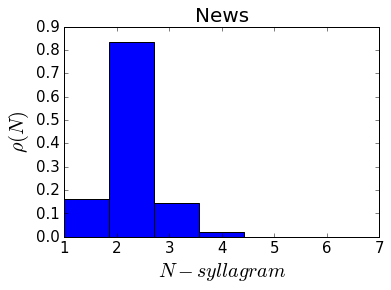

In [5]:
N_syl_dist(name, big, longest, FORMAT = 'png', Path = '')

<font color='blue' size='4'><b>check ratio of geometric sequence {$H_{\ell}$} </b><br></font>

In the function <font color='blue'>which_plot(x = 'H', SP = 'T', FORMAT = 'png')</font>, you can change the following parameters:<br>

1. max_range: number<br>
    the number of elements in the sequence you want to know<br>

2. x: 'H' or 'V'<br>
    you can chose the sequence you want (H/V)<br>

3. SP: 'T' or other string<br>
    if you want to save your plot, give it 'T'; otherwise give anything expect 'T'<br>

4. FORMAT: png, pdf, ps, eps and svg<br>
    if SP == 'T', give it the format you want

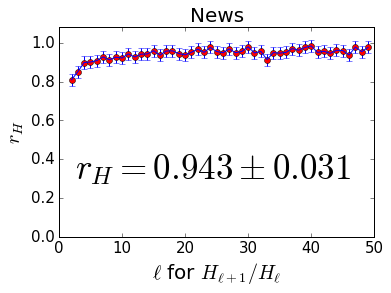

In [6]:
V, H = geometric_sequence(word, syl)
max_range = 50 #the number of elements in the sequence you want to know
x = 'H'
shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.
FORMAT = 'pdf' #the format of your picture


RH = which_plot(name, V, H, x, max_range, shift, FORMAT)

<font color='blue' size='4'><b>Heaps Law </b><br></font>

wiki: https://en.wikipedia.org/wiki/Heaps%27_law<br>

$V_R(n)=Kn^{\beta}$

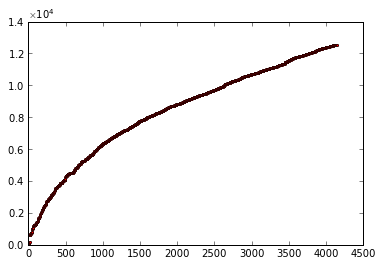

In [7]:
Seqword = word.sort_values(by='wordSeqOrder', ascending = True)
Seqword = Seqword.reset_index(drop = True)
Heaps = {}
Heaps['Seq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]
Heaps['freq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]

Counts = 0
C = []
for i in range(len(Seqword['wordFreq'])):
    Counts += Seqword['wordFreq'][i]
    Heaps['freq'][i] = Counts
    Heaps['Seq'][i] = Seqword['wordSeqOrder'][i]

    
fig, ax = plt.subplots(1, 1)
plt.plot(Heaps['Seq'], Heaps['freq'], 'ro', markersize = 2)
formatter = ticker.ScalarFormatter(useMathText=True) #https://atmamani.github.io/cheatsheets/matplotlib/matplotlib_2/
#formatter.set_scientific(True) 
formatter.set_powerlimits((-1,1)) 
ax.yaxis.set_major_formatter(formatter) 
plt.show()

<font color='blue' size='4'><b> draw FRD plot of words and syllagrams </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

/Users/lab/Downloads/Scaling-linguistics/scaling analysis/Chinese/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: divide by zero encountered in true_divide
  P = P + 1 / k ** s
/Users/lab/Downloads/Scaling-linguistics/scaling analysis/Chinese/Module/Curve_Fitting_MLE.py:15: RuntimeWarning: overflow encountered in true_divide
  P = P + 1 / k ** s


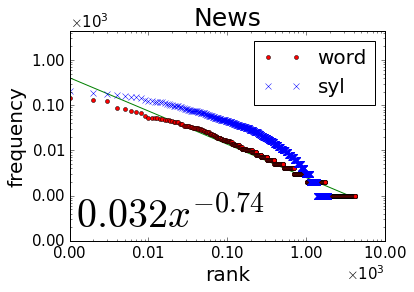

In [8]:
SP = 'T' #If you want to save picture, pleast assign SP = 'T'
FORMAT = 'eps' #the format of your picture
x_pos = 0
y_pos = 0

Zipf = FRD_plot(name, word, syl, x_pos, y_pos, FORMAT)

<font color='blue' size='4'><b>draw RRD plot </b><br></font>

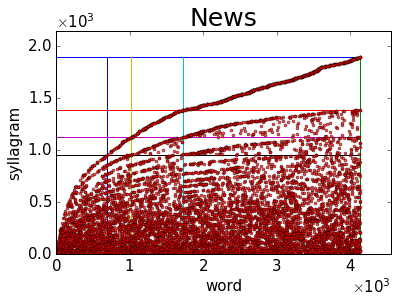

In [9]:
need_line = 'Y'
number_of_lines = 4
Color = '#ff0000'
FORMAT = 'pdf' #the format of your picture


coordinate = draw_RRD_plot(big, word, syl, longest, name, V, H,
                           need_line, number_of_lines, Color, FORMAT)

<font color='blue' size='4'><b> draw allocation-rank plot </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

<ref>Reference<br>
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
2. https://lmfit.github.io/lmfit-py/intro.html

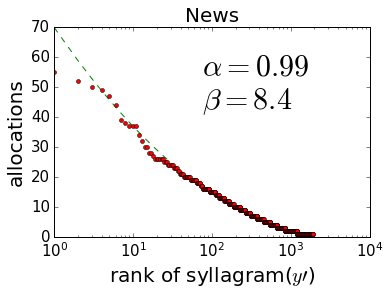

In [10]:
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want


Allo_plot(name, syl, x_pos, y_pos, FORMAT)

<font color='blue' size='4'><b> draw chain-rank plot </b><br></font>

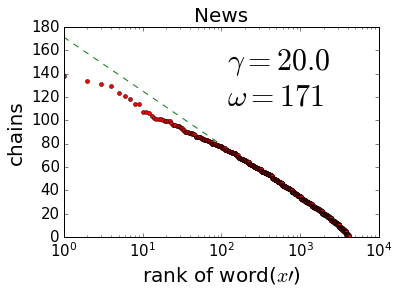

In [11]:
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want


Chain_plot(name, word, x_pos, y_pos, FORMAT)    

<font color='blue' size='4'><b> pick up points on scaling lines </b><br></font>
The following code is used to denosing of RRD plot and find scaling lines. Step: <br>
1. chose those points in $\{m, \ell\}, \{m+1, \ell+1\}$, ... blocks <br>
2. the points in each block should be in left upper conner <br>
3. use total variation reconstruction to pick up points on scaling lines<br>

g: set, $\{g_1, g_2,...,g_n\}$, where $g_k = (x_{avg}, y_{avg}), x/y_{avg}$ is points after moving average <br>
glu: set, $\{glu_1, glu_2,...,glu_n\}$, where $glu_k = (lupx, lupy)_k$, and $lupx/y$ denote points on scaling line $g_k$ <br>


detail: <br>
1. Module/count_allo.py <br>
2. http://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf <br>


the (8, 5) block have no points.


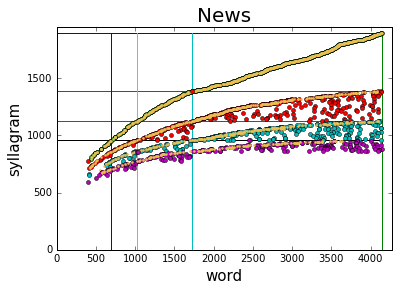

runtime: 20.91396403312683


In [12]:
tStart = time.time()
g, glu = plot_g(4, V, H, big, name, longest, toler = 50, avg_N = 50)
tEnd = time.time()
print('runtime:', tEnd - tStart)

<font color='blue' size='4'><b> calculate SC value </b><br></font>
We use moving average data to calculate $r_g$, S value and C value. <br>
If you want to pick up the points on scaling line and save them in excel, you can calculate $r_g$ of your data by "draw ratio of scaling function/Run_case_by_case.ipynb". <br>

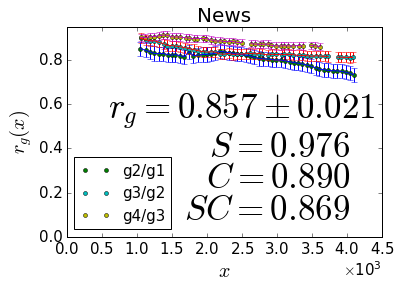

In [13]:
FORMAT = 'pdf' #the format of your picture

Rg = rg(name, g, FORMAT)

<font color='blue' size='4'><b> scaling fitting </b><br></font>
find out best fitting curve for scaling lines <br>
    select $g_1\sim g_n$ to be basis of scaling function, after that find out the best basis and parameters
    by check deviation of different basis.
    
   For instance, use $g_2$ to be basis
   0. fitting $g_2$ with theory model
   1. $g_1 = g_2/R_g, g_3 = R_g\times g_2, g_4 = R_g^2\times g_2......$
   2. tot_Dev['g2'] = $\sum(y_i - R_g^{i-2}g_2)^2$, where $y_i$ is real data and $g_i=R_g^{i-2}g_2$ is theory
   3. check all possible and resonable basis, findout the smallest tot_Dev['gn'] 

detail: Module/denoise.py <br> 

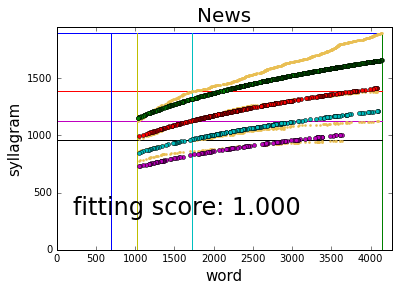

fitting range = [1035, 4142]


(array([162.56172427,   0.26004374]),
 array([[ 6.43354116e+00, -5.07899936e-03],
        [-5.07899936e-03,  4.01646945e-06]]))

In [14]:
FORMAT = 'png' #the format of your picture
        
fit_with_cut(glu, Rg[0], V, H, Zipf, name, FORMAT)

<font color='blue' size='4'><b>Network analysis</b><br></font>

In [15]:
graph_word, graph_syl = build_edge(coordinate)
G_word, cluster_word, word_degree_sequence = graph_word[0], graph_word[1], graph_word[2]
G_syl, cluster_syl, syl_degree_sequence = graph_syl[0], graph_syl[1], graph_syl[2]

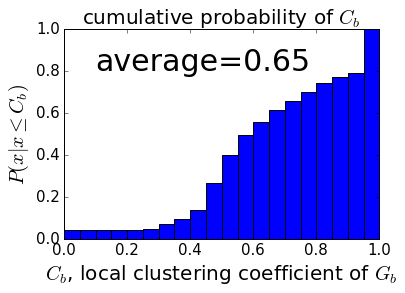

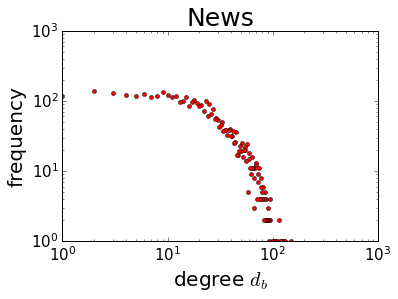

In [16]:
plot_cluster_word(name, cluster_word, FORMAT = 'pdf', Path = '')
plot_degree_word(name, word_degree_sequence, FORMAT = 'pdf', Path = '')

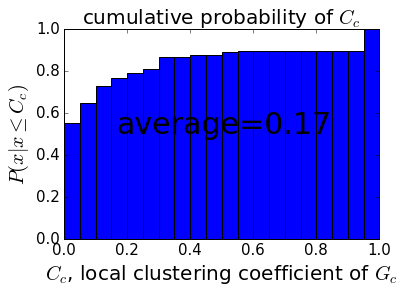

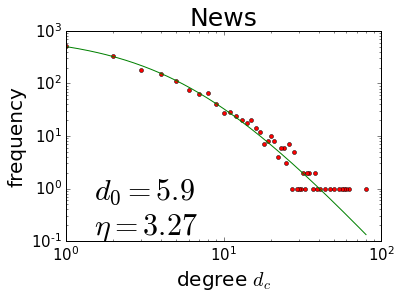

In [17]:
plot_cluster_syl(name, cluster_syl, FORMAT = 'pdf', Path = '')
plot_degree_syl(name, syl_degree_sequence, FORMAT = 'pdf', Path = '')

runtime: 32.77421522140503


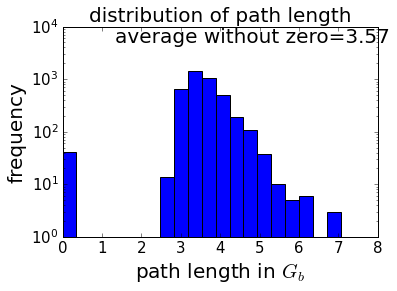

exclude zero path, the avg_path is 3.5749945435338693


In [18]:
tStart = time.time()
sum_shortest_path_word = build_shortest_path(G_word)
tEnd = time.time()
print('runtime:', tEnd - tStart)


plot_shortest_path(name, sum_shortest_path_word, G_name = '$G_b$')